# Pollen lab workshop

Make sure you are in an interactive session!!! 

The following scripts can be looked in detail in the notebook workshop_notes. 

In [2]:
from keras import backend as K


In [3]:
import glob, os 
from skimage import io, transform
import numpy as npconda 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from src.util import dataset 
from src.model import *
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Convolution3D
from keras.layers.convolutional import Conv2D
from sklearn.preprocessing import scale

### Read Data 

Reading the data to create the dataset

In [4]:
path="../pollendataset/Dataset/"
imlist= glob.glob(os.path.join(path, '*.jpg'))

In [5]:
# Load the data. The same as pollen dataset read-skimage (May take a few seconds)
data,labels= dataset(imlist)

In [6]:
# Create a training and testing dataset with 25% of the samples
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=.25,random_state=0)

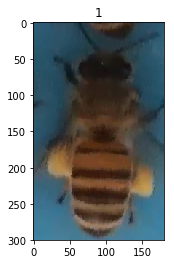

In [7]:
# Lets check that everything is ok 
plt.imshow(X_train[0])
plt.title(y_train[0])

# Basic Models

In [8]:
# lets load the modebls
from src.model import logistic_regresor, shallow_model, two_layer_model

In [9]:
# check shape of the input image to fit with the network 
X_train[0].shape

(300, 180, 3)

In [10]:
model=shallow_model(input_shape=(300,180,3),kernels=4,dense=10,pool_size=(2,2),stride=(15,15))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 286, 166, 4)       2704      
_________________________________________________________________
activation_1 (Activation)    (None, 286, 166, 4)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 143, 83, 4)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 47476)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                474770    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 477,496
Trainable params: 477,496
Non-trainable params: 0
_________________________________________________________________


In [12]:
from src.evaluator import Experiment
experiment = Experiment(X_train,to_categorical(y_train),X_test,to_categorical(y_test))
experiment.epochs =50

...Launching Experiment....
Train on 535 samples, validate on 179 samples
Epoch 1/50
535/535 [==============================] - 11s - loss: 0.6964 - acc: 0.4617 - val_loss: 0.6936 - val_acc: 0.5028
Epoch 2/50
535/535 [==============================] - 1s - loss: 0.6900 - acc: 0.5327 - val_loss: 0.6903 - val_acc: 0.5307
Epoch 3/50
535/535 [==============================] - 1s - loss: 0.6871 - acc: 0.5682 - val_loss: 0.6867 - val_acc: 0.5754
Epoch 4/50
535/535 [==============================] - 1s - loss: 0.6820 - acc: 0.6486 - val_loss: 0.6834 - val_acc: 0.5922
Epoch 5/50
535/535 [==============================] - 1s - loss: 0.6788 - acc: 0.6486 - val_loss: 0.6804 - val_acc: 0.6145
Epoch 6/50
535/535 [==============================] - 1s - loss: 0.6744 - acc: 0.6561 - val_loss: 0.6757 - val_acc: 0.6592
Epoch 7/50
535/535 [==============================] - 1s - loss: 0.6699 - acc: 0.7009 - val_loss: 0.6733 - val_acc: 0.6201
Epoch 8/50
535/535 [==============================] - 1s - loss:

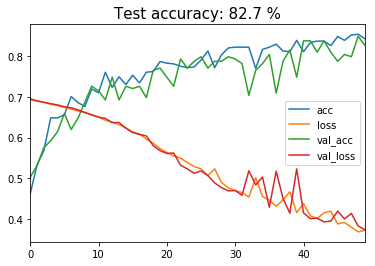

In [13]:
experiment.launch_experiment(model)

# Run it again, this time first run this command on the command line open last

```bash

pip install tensorflow-gpu 

```

# DID YOU SEE THE DIFFERENCE???? 
When running only with the cpu is really slow. By using gpu computations goes much faster. To activate gpu power however in tensor flow. Tensorflow-gpu has to be reinstalled so it detects the gpu. 


# Now you??? 

Try to run an experiment, using logistic regressor, shallow model, two_layer model. Use random parameters

In [ ]:
# space to call your designated experiment

# Batch Job

Now we are ready to write a bash and create a function that explores some configurations so then we can compare wich ones are better. Check the shallow_experiment.py script and the bee1.sh batch file. 